In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the LSST bandpass classes (to calculate effective wavelengths)
from lsst.sims.photUtils import Bandpass
# import the seeing model (to calculate seeing under arbitrary conditions/filters)
from lsst.sims.seeingModel import SeeingModel
# import trailing losses model from sims_movingObjects (in the Obs class)
from lsst.sims.movingObjects import BaseObs

In [3]:
# Read the bandpasses and calculate the effective wavelengths
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
lsst = {}
effwavelen = np.zeros(len(filterlist), float)
for i, f in enumerate(filterlist):
    lsst[f] = Bandpass()
    lsst[f].readThroughput(os.path.join(os.getenv('LSST_THROUGHPUTS_BASELINE'), 'total_' + f + '.dat'))
    effwavelen[i], effphi = lsst[f].calcEffWavelen()
    print(f, effwavelen[i])

u 365.985383433
g 478.888235712
r 619.655676604
i 752.72224158
z 868.016429756
y 969.873953116


In [4]:
help(SeeingModel)

Help on class SeeingModel in module lsst.sims.seeingModel.seeingModel:

class SeeingModel(builtins.object)
 |  LSST FWHM calculations for FWHM_effective and FWHM_geometric.
 |  Calculations of the delivered values are based on equations in Document-20160
 |  ("Atmospheric and Delivered Image Quality in OpSim" by Bo Xin, George Angeli, Zeljko Ivezic)
 |  
 |  Parameters
 |  ----------
 |  telescope_seeing : float, opt
 |      The contribution to the FWHM at zenith from the telescope, in arcseconds.
 |      Default 0.25"
 |  optical_design_seeing : float, opt
 |      The contribution to the FWHM at zenith from the optical design, in arcseconds.
 |      Default 0.08"
 |  camera_seeing : float, opt
 |      The contribution to the FWHM at zenith from the camera components, in arcseconds.
 |      Default 0.30"
 |  raw_seeing_wavelength : float, opt
 |      The wavelength (in nm) of the provided value of the atmospheric fwhm at zenith.
 |      Default 500nm.
 |  filter_effwavelen : numpy.ndar

In [5]:
seeing_model = SeeingModel(filter_effwavelens=effwavelen)

In [6]:
help(BaseObs.calcTrailingLosses)

Help on function calcTrailingLosses in module lsst.sims.movingObjects.baseObs:

calcTrailingLosses(self, velocity, seeing, texp=30.0)
    Calculate the detection and SNR trailing losses.
    
    'Trailing' losses = loss in sensitivity due to the photons from the source being
    spread over more pixels; thus more sky background is included when calculating the
    flux from the object and thus the SNR is lower than for an equivalent brightness
    stationary/PSF-like source. dmagTrail represents this loss.
    
    'Detection' trailing losses = loss in sensitivity due to the photons from the source being
    spread over more pixels, in a non-stellar-PSF way, while source detection is (typically) done
    using a stellar PSF filter and 5-sigma cutoff values based on assuming peaks from stellar PSF's
    above the background; thus the SNR is lower than for an equivalent brightness stationary/PSF-like
    source (and by a greater factor than just the simple SNR trailing loss above).
    

In [7]:
obs_model = BaseObs()

Range in trailing losses between u and y @ 1deg/day:  -0.0643668989614
Range in trailing losses between u and y @ 3deg/day:  -0.0939635103632


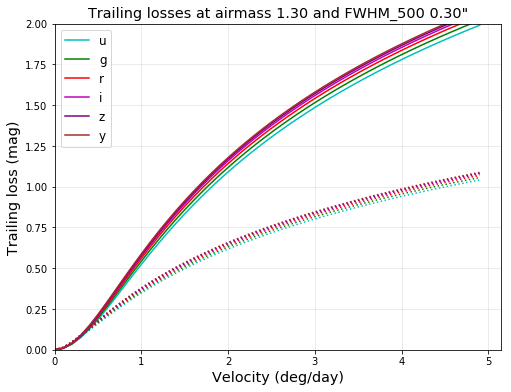

In [8]:
filtercolors = {'u': 'c', 'g': 'g', 'r': 'r', 'i':'m', 'z': 'purple', 'y': 'brown'}

fwhm500 = 0.3  # arcseconds
airmass = 1.3
velocities = np.arange(0, 5, 0.1)  # deg/day
dmagTrail = np.empty((len(velocities), len(filterlist)), float)
dmagDetect = np.empty((len(velocities), len(filterlist)), float)
for i, velocity in enumerate(velocities):
    # get the seeingFwhmGeom in each filter
    fwhmEff, fwhmGeom = seeing_model.seeing_at_airmass(fwhm_500=fwhm500, airmass=airmass)
    # calculate the trailing losses in each filter
    dmagTrail[i], dmagDetect[i] = obs_model.calcTrailingLosses(velocity=velocity, seeing=fwhmGeom)

plt.figure(figsize=(8, 6))
for i, f in enumerate(filterlist):
    plt.plot(velocities, dmagTrail[:,i], linestyle=":", color=filtercolors[f])
    plt.plot(velocities, dmagDetect[:,i], linestyle="-", color=filtercolors[f], label=f)
plt.legend(loc='upper left', fancybox=True, numpoints=1, fontsize='large')
plt.xlabel("Velocity (deg/day)", fontsize='x-large')
plt.ylabel("Trailing loss (mag)", fontsize='x-large')
plt.title("Trailing losses at airmass %.2f and FWHM_500 %.2f\"" % (airmass, fwhm500), fontsize='x-large')
plt.xlim(xmin=0)
plt.ylim(0, 2.0)
plt.grid(True, alpha=0.3)
idx = np.where(velocities == 1.0)[0]
rangeMag = dmagDetect[idx, 0] - dmagDetect[idx, -1]
print("Range in trailing losses between u and y @ 1deg/day: ", rangeMag[0])
idx = np.where(velocities == 3.0)[0]
rangeMag = dmagDetect[idx, 0] - dmagDetect[idx, -1]
print("Range in trailing losses between u and y @ 3deg/day: ", rangeMag[0])

Range in trailing losses between u and y @ 1deg/day:  -0.0951576034538
Range in trailing losses between u and y @ 3deg/day:  -0.192084559363


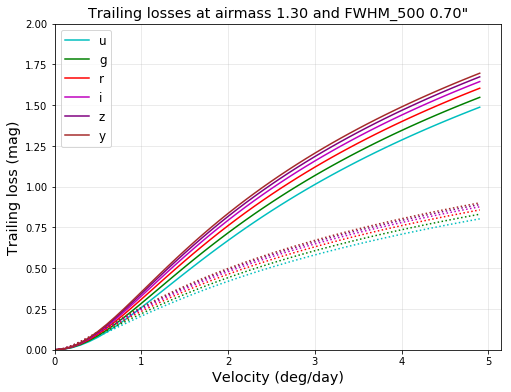

In [9]:
fwhm500 = 0.7  # arcseconds
airmass = 1.3
velocities = np.arange(0, 5, 0.1)  # deg/day
dmagTrail = np.empty((len(velocities), len(filterlist)), float)
dmagDetect = np.empty((len(velocities), len(filterlist)), float)
for i, velocity in enumerate(velocities):
    # get the seeingFwhmGeom in each filter
    fwhmEff, fwhmGeom = seeing_model.seeing_at_airmass(fwhm_500=fwhm500, airmass=airmass)
    # calculate the trailing losses in each filter
    dmagTrail[i], dmagDetect[i] = obs_model.calcTrailingLosses(velocity=velocity, seeing=fwhmGeom)

plt.figure(figsize=(8, 6))
for i, f in enumerate(filterlist):
    plt.plot(velocities, dmagTrail[:,i], linestyle=":", color=filtercolors[f])
    plt.plot(velocities, dmagDetect[:,i], linestyle="-", color=filtercolors[f], label=f)
plt.legend(loc='upper left', fancybox=True, numpoints=1, fontsize='large')
plt.xlabel("Velocity (deg/day)", fontsize='x-large')
plt.ylabel("Trailing loss (mag)", fontsize='x-large')
plt.title("Trailing losses at airmass %.2f and FWHM_500 %.2f\"" % (airmass, fwhm500), fontsize='x-large')
plt.xlim(xmin=0)
plt.ylim(0, 2.0)
plt.grid(True, alpha=0.3)
idx = np.where(velocities == 1.0)[0]
rangeMag = dmagDetect[idx, 0] - dmagDetect[idx, -1]
print("Range in trailing losses between u and y @ 1deg/day: ", rangeMag[0])
idx = np.where(velocities == 3.0)[0]
rangeMag = dmagDetect[idx, 0] - dmagDetect[idx, -1]
print("Range in trailing losses between u and y @ 3deg/day: ", rangeMag[0])

Range in trailing losses between u and y @ 1deg/day:  -0.0513805599446
Range in trailing losses between u and y @ 3deg/day:  -0.188242610829


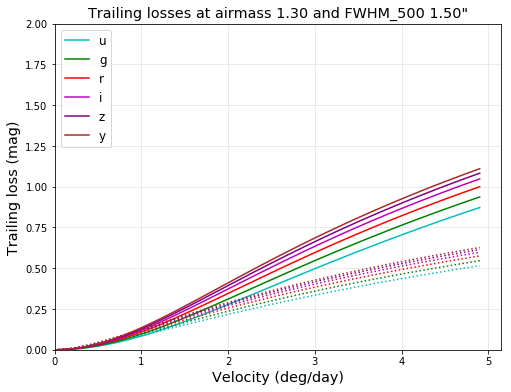

In [10]:
fwhm500 = 1.5  # arcseconds
airmass = 1.3
velocities = np.arange(0, 5, 0.1)  # deg/day
dmagTrail = np.empty((len(velocities), len(filterlist)), float)
dmagDetect = np.empty((len(velocities), len(filterlist)), float)
for i, velocity in enumerate(velocities):
    # get the seeingFwhmGeom in each filter
    fwhmEff, fwhmGeom = seeing_model.seeing_at_airmass(fwhm_500=fwhm500, airmass=airmass)
    # calculate the trailing losses in each filter
    dmagTrail[i], dmagDetect[i] = obs_model.calcTrailingLosses(velocity=velocity, seeing=fwhmGeom)

plt.figure(figsize=(8, 6))
for i, f in enumerate(filterlist):
    plt.plot(velocities, dmagTrail[:,i], linestyle=":", color=filtercolors[f])
    plt.plot(velocities, dmagDetect[:,i], linestyle="-", color=filtercolors[f], label=f)
plt.legend(loc='upper left', fancybox=True, numpoints=1, fontsize='large')
plt.xlabel("Velocity (deg/day)", fontsize='x-large')
plt.ylabel("Trailing loss (mag)", fontsize='x-large')
plt.title("Trailing losses at airmass %.2f and FWHM_500 %.2f\"" % (airmass, fwhm500), fontsize='x-large')
plt.xlim(xmin=0)
plt.ylim(0, 2.0)
plt.grid(True, alpha=0.3)
idx = np.where(velocities == 1.0)[0]
rangeMag = dmagDetect[idx, 0] - dmagDetect[idx, -1]
print("Range in trailing losses between u and y @ 1deg/day: ", rangeMag[0])
idx = np.where(velocities == 3.0)[0]
rangeMag = dmagDetect[idx, 0] - dmagDetect[idx, -1]
print("Range in trailing losses between u and y @ 3deg/day: ", rangeMag[0])

In [11]:
fwhm500 = 0.7
airmasses = np.arange(1.0, 3.0, 0.05)
fwhmGeoms = np.zeros((len(airmasses), len(filterlist)), float)
for i, airmass in enumerate(airmasses):
    fwhmEffs, fwhmGeoms[i] = seeing_model.seeing_at_airmass(fwhm_500=fwhm500, airmass=airmass)

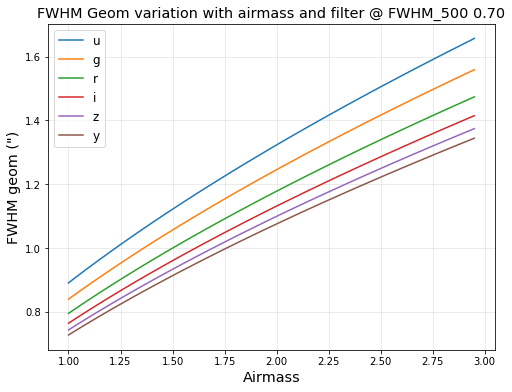

In [12]:
plt.figure(figsize=(8, 6))
for i, f in enumerate(filterlist):
    plt.plot(airmasses, fwhmGeoms[:,i], label=f)
plt.legend(loc='upper left', fancybox=True, numpoints=1, fontsize='large')
plt.xlabel("Airmass", fontsize='x-large')
plt.ylabel("FWHM geom (\")", fontsize='x-large')
plt.title("FWHM Geom variation with airmass and filter @ FWHM_500 %.2f" % fwhm500, fontsize='x-large')
#plt.xlim(xmin=0)
#plt.ylim(ymin=0)
plt.grid(True, alpha=0.3)